# Naturale Language Processing notebook example

Welcome to NLP notebook example!

The first time you run this notebook execute the following line (you can comment it next time): be sure to have requirements.txt

In [1]:
import sys
!{sys.executable} -m pip install --user -r requirements.txt

In [31]:
import pandas as pd 
import numpy as np
from gensim.models import Word2Vec
from time import time
import csv
import preprocessing as pp
import nlp_utility

In [3]:
df=pd.read_csv('message_example.csv')

In [4]:
df.head()

,time,error_category,error_message
0,1604793600781,PERMISSION_DENIED,[gfalt_copy_file][perform_copy][gfal_http_copy...
1,1604793600762,PERMISSION_DENIED,[gfalt_copy_file][perform_copy][gfal_http_copy...
2,1604793604623,COMMUNICATION_ERROR_ON_SEND,DESTINATION OVERWRITE srm-ifce err: Communicat...
3,1604793605449,INVALID_REQUEST_DESCRIPTOR,DESTINATION MAKE_PARENT srm-ifce err: Invalid ...
4,1604793608103,CONNECTION_TIMED_OUT,DESTINATION SRM_PUT_TURL srm-ifce err: Connect...


In [5]:
pd.set_option('display.max_colwidth', -1)
df

,time,error_category,error_message
0,1604793600781,PERMISSION_DENIED,[gfalt_copy_file][perform_copy][gfal_http_copy] DESTINATION OVERWRITE [gfal_http_copy_overwrite] [gfal_http_exists][gfal_http_access][davix2gliberr] Failure (Neon): SSL handshake failed: Connection timed out during SSL handshake after 1 attempts
1,1604793600762,PERMISSION_DENIED,[gfalt_copy_file][perform_copy][gfal_http_copy] DESTINATION OVERWRITE [gfal_http_copy_overwrite] [gfal_http_exists][gfal_http_access][davix2gliberr] Failure (Neon): SSL handshake failed: Connection timed out during SSL handshake after 1 attempts
2,1604793604623,COMMUNICATION_ERROR_ON_SEND,"DESTINATION OVERWRITE srm-ifce err: Communication error on send, err: [SE][srmRm][] httpg://storm-fe.cr.cnaf.infn.it:8444/srm/managerv2: CGSI-gSOAP running on fts-atlas-006.cern.ch reports Error reading token data header: Connection closed"
3,1604793605449,INVALID_REQUEST_DESCRIPTOR,"DESTINATION MAKE_PARENT srm-ifce err: Invalid request descriptor, err: [SE][Mkdir][SRM_INVALID_REQUEST] httpg://storm.ifca.es:8444/srm/managerv2: srm://storm.ifca.es/srm:/srm01.ifca.es:8444/srm/managerv2?SFN=/cms/store/user/cprieels/CRAB_PrivateMC/DMscalar_Dilepton_top_tWChan_Mchi1_Mphi450_RunIIAutumn18_AODSIM_PrivateFullProd_Sep2020_v2/201106_085455/0000/log: invalid surl: srm://storm.ifca.es"
4,1604793608103,CONNECTION_TIMED_OUT,"DESTINATION SRM_PUT_TURL srm-ifce err: Connection timed out, err: [SE][StatusOfPutRequest][ETIMEDOUT] httpg://storm-fe.cr.cnaf.infn.it:8444/srm/managerv2: User timeout over"
5,1604793610181,COMMUNICATION_ERROR_ON_SEND,"DESTINATION OVERWRITE srm-ifce err: Communication error on send, err: [SE][srmRm][] httpg://svr018.gla.scotgrid.ac.uk:8446/srm/managerv2: CGSI-gSOAP running on fts-atlas-016.cern.ch reports Error reading token data header: Connection closed"
6,1604793612111,COMMUNICATION_ERROR_ON_SEND,"DESTINATION OVERWRITE srm-ifce err: Communication error on send, err: [SE][srmRm][] httpg://svr018.gla.scotgrid.ac.uk:8446/srm/managerv2: CGSI-gSOAP running on fts-atlas-008.cern.ch reports Error reading token data header: Connection closed"
7,1604793612889,COMMUNICATION_ERROR_ON_SEND,"DESTINATION OVERWRITE srm-ifce err: Communication error on send, err: [SE][srmRm][] httpg://gse1.physik.uni-mainz.de:8444/srm/managerv2: CGSI-gSOAP running on fts-atlas-004.cern.ch reports Error reading token data header: Connection closed"
8,1604793612689,INPUT/OUTPUT_ERROR,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Transfer failed: failure: Remote copy failed with status code 0: error:14077410:SSL routines:SSL23_GET_SERVER_HELLO:sslv3 alert handshake failure"
9,1604793615778,INVALID_REQUEST_DESCRIPTOR,"DESTINATION MAKE_PARENT srm-ifce err: Invalid request descriptor, err: [SE][Mkdir][SRM_INVALID_REQUEST] httpg://storm.ifca.es:8444/srm/managerv2: srm://storm.ifca.es/srm:/srm01.ifca.es:8444/srm/managerv2?SFN=/cms/store/user/cprieels/CRAB_PrivateMC/DMpseudo_Dilepton_top_tWChan_Mchi1_Mphi20_RunIIFall17_AODSIM_PrivateFullProd_Sep2020_v2/201107_082833/0000: invalid surl: srm://storm.ifca.es"


## Preprocessing
Messages are cleaned from file paths, urls etc.(this process can be time requiring)

Tokenization is done inline and tokens cleaned from a stopword list are given as input to Word2Vec model.

In [6]:
before_number=df.shape[0] #message number before cleaning
print('...cleaning')
start_time_preproc= time()
df['cleaned_strings'] = pp.clean_messages(df['error_message'])
prepr_time=time() - start_time_preproc


...cleaning


In [7]:
df_cleaned=df.drop_duplicates('cleaned_strings')
after_number=df_cleaned.shape[0] #message number after cleaning

In [8]:
print("number of  messages before cleaning:",before_number)
print("number of  messages after cleaning:",after_number)

number of  messages before cleaning: 711828
number of  messages after cleaning: 641


In [9]:
df_cleaned

,time,error_category,error_message,cleaned_strings
0,1604793600781,PERMISSION_DENIED,[gfalt_copy_file][perform_copy][gfal_http_copy] DESTINATION OVERWRITE [gfal_http_copy_overwrite] [gfal_http_exists][gfal_http_access][davix2gliberr] Failure (Neon): SSL handshake failed: Connection timed out during SSL handshake after 1 attempts,destination overwrite failure neon ssl handshake failed connection timed out during ssl handshake after attempts
2,1604793604623,COMMUNICATION_ERROR_ON_SEND,"DESTINATION OVERWRITE srm-ifce err: Communication error on send, err: [SE][srmRm][] httpg://storm-fe.cr.cnaf.infn.it:8444/srm/managerv2: CGSI-gSOAP running on fts-atlas-006.cern.ch reports Error reading token data header: Connection closed",destination overwrite srm ifce err communication error on send err cgsi gsoap running on reports error reading token data header connection closed
3,1604793605449,INVALID_REQUEST_DESCRIPTOR,"DESTINATION MAKE_PARENT srm-ifce err: Invalid request descriptor, err: [SE][Mkdir][SRM_INVALID_REQUEST] httpg://storm.ifca.es:8444/srm/managerv2: srm://storm.ifca.es/srm:/srm01.ifca.es:8444/srm/managerv2?SFN=/cms/store/user/cprieels/CRAB_PrivateMC/DMscalar_Dilepton_top_tWChan_Mchi1_Mphi450_RunIIAutumn18_AODSIM_PrivateFullProd_Sep2020_v2/201106_085455/0000/log: invalid surl: srm://storm.ifca.es",destination srm ifce err invalid request descriptor err invalid surl
4,1604793608103,CONNECTION_TIMED_OUT,"DESTINATION SRM_PUT_TURL srm-ifce err: Connection timed out, err: [SE][StatusOfPutRequest][ETIMEDOUT] httpg://storm-fe.cr.cnaf.infn.it:8444/srm/managerv2: User timeout over",destination srm ifce err connection timed out err user timeout over
8,1604793612689,INPUT/OUTPUT_ERROR,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Transfer failed: failure: Remote copy failed with status code 0: error:14077410:SSL routines:SSL23_GET_SERVER_HELLO:sslv3 alert handshake failure",transfer error copy failed with mode pull with error transfer failed failure remote copy failed with status code alert handshake failure
10,1604793618676,CONNECTION_TIMED_OUT,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: Request cancellation was requested.",transfer error copy failed with mode push with error request cancellation was requested
15,1604793633546,INPUT/OUTPUT_ERROR,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Error string contains not valid UTF-8 chars",transfer error copy failed with mode pull with error error string contains not valid utf chars
16,1604793635640,DEVICE_OR_RESOURCE_BUSY,SOURCE SRM_GET_TURL error on the turl request : [SE][PrepareToGet][SRM_FILE_UNAVAILABLE] File is not online.,source error on the turl request file is not online
21,1604793650514,INPUT/OUTPUT_ERROR,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: Transfer failed: failure: Remote copy failed with status code 507: \n",transfer error copy failed with mode push with error transfer failed failure remote copy failed with status code n
22,1604793650656,HOST_IS_DOWN,[gfalt_copy_file][perform_copy][gfal_http_copy] DESTINATION OVERWRITE [gfal_http_copy_overwrite] [gfal_http_exists][gfal_http_access][davix2gliberr] Result Invalid read in request after 1 attempts,destination overwrite result invalid read in request after attempts


In [10]:
c=nlp_utility.callback()

In [33]:
corpus = pp.MyCorpus(df_cleaned)
print('...starting training')
start_time_train = time()
model = Word2Vec(sentences=corpus,compute_loss=True,size=300,window=7, min_count=1, workers=4, iter=30,callbacks=[c])
tot_time=time() - start_time_train
model.save('example_model.model')

...starting training
Loss after epoch 0: 22441.931640625
Loss after epoch 1: 20305.298828125
Loss after epoch 2: 16854.36328125
Loss after epoch 3: 15768.7421875
Loss after epoch 4: 15353.84375
Loss after epoch 5: 14794.1484375
Loss after epoch 6: 14016.6015625
Loss after epoch 7: 13404.6484375
Loss after epoch 8: 12601.703125
Loss after epoch 9: 12367.609375
Loss after epoch 10: 11968.859375
Loss after epoch 11: 11874.046875
Loss after epoch 12: 11377.734375
Loss after epoch 13: 11334.0
Loss after epoch 14: 11221.59375
Loss after epoch 15: 10910.0625
Loss after epoch 16: 10686.75
Loss after epoch 17: 10637.828125
Loss after epoch 18: 10461.703125
Loss after epoch 19: 10301.875
Loss after epoch 20: 10179.84375
Loss after epoch 21: 10112.65625
Loss after epoch 22: 10025.59375
Loss after epoch 23: 9936.53125
Loss after epoch 24: 9925.40625
Loss after epoch 25: 9880.8125
Loss after epoch 26: 9809.9375
Loss after epoch 27: 9839.6875
Loss after epoch 28: 9626.8125
Loss after epoch 29: 9622.

Text(0, 0.5, 'delta loss')

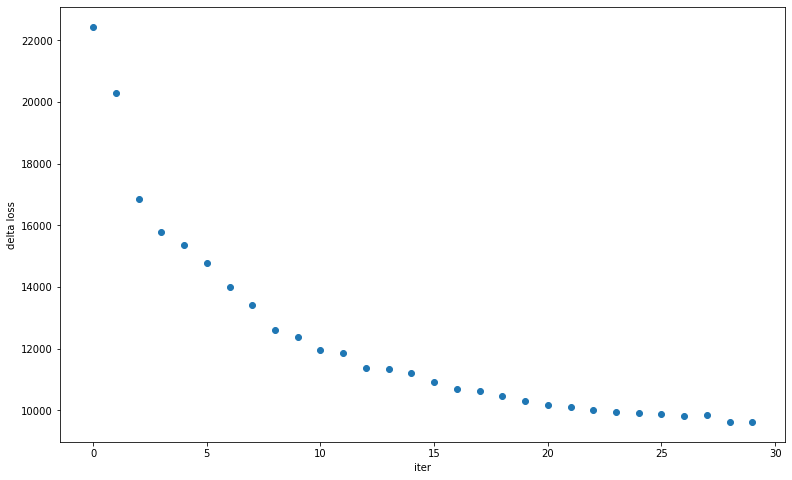

In [45]:
from matplotlib import pyplot as plt
fig, ax=plt.subplots(figsize=(13,8))
ax.scatter(np.arange(0,len(c.loss_vec)),c.loss_vec)
ax.set_xlabel('iter')
ax.set_ylabel('delta loss')


In [13]:
print('preprocessing time: %.2f seconds'% prepr_time)
print('training time: %.2f seconds'%tot_time)

preprocessing time: 172.15 seconds
training time: 2.90 seconds


### Just few words about MyCorpus object

Why didn't we feed word2vec model with a plain Python list of tokens? MyCorpus object is much more memory friendly! A list would reside fully in the memory;with MyCorpus object, instead, **at most one vector** resides in RAM **at a time**. In such a way the corpus can be as large as we want.

In [14]:
print(corpus)

*print* just outputs address of the object in memory. To see the constituent vectors, let’s iterate over the corpus and print each document vector (one at a time):

In [15]:
for line in corpus:
    print(line)

['destination', 'overwrite', 'failure', 'neon', 'ssl', 'handshake', 'failed', 'connection', 'timed', 'out', 'during', 'ssl', 'handshake', 'after', 'attempts']
['destination', 'overwrite', 'communication', 'error', 'send', 'cgsi', 'gsoap', 'running', 'reports', 'error', 'reading', 'token', 'data', 'header', 'connection', 'closed']
['destination', 'invalid', 'request', 'descriptor', 'invalid', 'surl']
['destination', 'connection', 'timed', 'out', 'user', 'timeout', 'over']
['transfer', 'error', 'copy', 'failed', 'mode', 'pull', 'error', 'transfer', 'failed', 'failure', 'remote', 'copy', 'failed', 'status', 'code', 'alert', 'handshake', 'failure']
['transfer', 'error', 'copy', 'failed', 'mode', 'push', 'error', 'request', 'cancellation', 'requested']
['transfer', 'error', 'copy', 'failed', 'mode', 'pull', 'error', 'error', 'string', 'contains', 'not', 'valid', 'utf', 'chars']
['source', 'error', 'turl', 'request', 'file', 'not', 'online']
['transfer', 'error', 'copy', 'failed', 'mode', 'p

## Understanding Word2Vec
Let's play a bit with our model to understand what it is doing.

Getting model vocabulary and total amount of words:

In [16]:
len(model.wv.vocab)

647

In [17]:
model.wv.vocab

{'destination': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef99e8>,
 'overwrite': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef8a58>,
 'failure': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef88d0>,
 'neon': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef86d8>,
 'ssl': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef4c88>,
 'handshake': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef4e80>,
 'failed': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef4668>,
 'connection': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef4860>,
 'timed': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef4128>,
 'out': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef4f28>,
 'during': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef40b8>,
 'after': <gensim.models.keyedvectors.Vocab at 0x7f39d6ef4fd0>,
 'attempts': <gensim.models.keyedvectors.Vocab at 0x7f39df1e9a90>,
 'communication': <gensim.models.keyedvectors.Vocab at 0x7f39d6f00b00>,
 'error': <gensim.models.keyedvectors.Vocab at 0x7f39d6f00f98>,
 'send': <g

Checking the "most similar words", using the default "cosine similarity" measure:

In [18]:
print(model.wv.most_similar(positive=['pull','push'])) #sum

[('mode', 0.9976450204849243), ('copy', 0.9941648840904236), ('failure', 0.9906255602836609), ('failed', 0.9840845465660095), ('transfer', 0.9689042568206787), ('remote', 0.9598989486694336), ('problem', 0.9480327367782593), ('side', 0.9456154108047485), ('put', 0.9357068538665771), ('code', 0.9299448728561401)]


In [19]:
print(model.wv.most_similar(positive=['pull'],negative=['push']))#difference

[('communicat', 0.6667771935462952), ('geonmo', 0.6526103615760803), ('sub', 0.6386674642562866), ('fr', 0.5231714844703674), ('affecting', 0.519861102104187), ('whole', 0.5175526142120361), ('communications', 0.514044463634491), ('subj', 0.510315477848053), ('rsa', 0.4973412752151489), ('found', 0.49355950951576233)]


Getting similarity score for each pair and checking not matching word:

In [20]:
pairs = [
    ('pull', 'push'),  #similar role
    ('pull', 'copy'),   #often close
    ('pull', 'time'),  #sometimes appearing together
    ('pull', 'directory'),    # sometimes appearing together
    ('pull', 'not'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model.wv.similarity(w1, w2)))


'pull'	'push'	0.97
'pull'	'copy'	0.99
'pull'	'time'	0.32
'pull'	'directory'	-0.31
'pull'	'not'	-0.12


In [21]:
print(model.wv.doesnt_match(['pull','push','mode','not']))

not


/eos/user/m/miolocco/.local/lib/python3.6/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [22]:
df_cleaned['error_message'][df_cleaned['error_message'].astype(str).str.contains('pull',na=False)]

8         TRANSFER  ERROR: Copy failed with mode 3rd pull, with error: Transfer failed: failure: Remote copy failed with status code 0: error:14077410:SSL routines:SSL23_GET_SERVER_HELLO:sslv3 alert handshake failure                                                                                                                                                                                                                                                                                                                                                                                                                                               
15        TRANSFER  ERROR: Copy failed with mode 3rd pull, with error: Error string contains not valid UTF-8 chars                                                                                                                                                                                                                                              

In [23]:
df_cleaned[(df_cleaned['error_message'].astype(str).str.contains('pull',na=False)) & (df_cleaned['error_message'].astype(str).str.contains('directory',na=False) )]

,time,error_category,error_message,cleaned_strings
75,1604793792291,INPUT/OUTPUT_ERROR,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Transfer failed: failure: Too many attempts to select pool; last pool lunarc_lu_se_103-hep@dc103-hep_lunarc_lu_seDomain failed with Could not create MoverProtocol mover for RemoteHttpsDataTransfer-1.1:https://torik1.ulakbim.gov.tr:443/dpm/ulakbim.gov.tr/home/atlas/atlasscratchdisk/rucio/tests/65/39/file77_784e172d-25f0-41bc-a36a-57c04493132e?copy_mode=pull: directory not found: /etc/grid-security/certificates",transfer error copy failed with mode pull with error transfer failed failure too many attempts to select pool last pool failed with could not create moverprotocol mover for remotehttpsdatatransfer directory not found
84,1604793808760,INPUT/OUTPUT_ERROR,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Transfer failed: failure: Too many attempts to select pool; last pool s11-iep-grid.saske.sk_2@s11-iep-gridDomain failed with Could not create MoverProtocol mover for RemoteHttpsDataTransfer-1.1:https://atlas.dcache.nikhef.nl:2880/pnfs/nikhef.nl/data/atlas/atlasscratchdisk/rucio/tests/df/4c/file75_c5454de7-0bd7-4222-9f57-a78a24d73fc6?copy_mode=pull: directory not found: /etc/grid-security/certificates",transfer error copy failed with mode pull with error transfer failed failure too many attempts to select pool last pool griddomain failed with could not create moverprotocol mover for remotehttpsdatatransfer directory not found
28989,1604812782936,INPUT/OUTPUT_ERROR,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Transfer failed: failure: Post-processing failed: No such file or directory: 0000A76CAA7FAD624B7A8D0DB7369EAABB3C",transfer error copy failed with mode pull with error transfer failed failure post processing failed no such file or directory


Even if 'pull' and 'push' never appear together the model understands they have similar role (high similarity score): 

In [24]:
df_cleaned[(df_cleaned['error_message'].astype(str).str.contains('pull',na=False)) & (df_cleaned['error_message'].astype(str).str.contains('push',na=False) )]

,time,error_category,error_message,cleaned_strings


Dictionary of known words and their frequency in the corpus:

In [25]:
w2c = dict()
for item in model.wv.vocab:
    w2c[item] = model.wv.vocab[item].count
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
w2cSortedList = list(w2cSorted.keys())
w2cSorted

{'error': 1113,
 'failed': 752,
 'transfer': 591,
 'copy': 319,
 'certificate': 298,
 'mode': 253,
 'server': 241,
 'failure': 211,
 'responded': 197,
 'found': 165,
 'not': 161,
 'pull': 154,
 'peers': 152,
 'chain': 139,
 'status': 133,
 'destination': 116,
 'no': 113,
 'connection': 109,
 'file': 95,
 'at': 89,
 'rejected': 87,
 'system': 86,
 'checksum': 85,
 'push': 81,
 'out': 79,
 'timed': 78,
 'subjects': 76,
 'dn': 76,
 'following': 76,
 'validation': 76,
 'errors': 76,
 'position': 74,
 'category': 72,
 'end': 70,
 'problematic': 69,
 'subject': 69,
 'could': 64,
 'crl': 64,
 'request': 62,
 'data': 61,
 'connect': 55,
 'problem': 54,
 'source': 48,
 'xrdcl': 47,
 'copyprocess': 47,
 'run': 47,
 'unable': 46,
 'ca': 46,
 'reason': 44,
 'remote': 43,
 'errno': 43,
 'command': 42,
 'attempts': 39,
 'code': 39,
 'globuserror': 39,
 'while': 36,
 'http': 35,
 'neon': 34,
 'ssl': 34,
 'sending': 34,
 'handshake': 33,
 'get': 33,
 'after': 32,
 'open': 32,
 'or': 31,
 'directory': 

## Getting more into NLP tasks

In [26]:
model_name='example_model.model'
model=Word2Vec.load(model_name)

In [32]:
vectors_sent=nlp_utility.vectorize_messages(df_cleaned['cleaned_strings'],model,tf_idf=True)

NameError: name 'np' is not defined

In [ ]:
len(vectors_sent)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(vectors_sent,df_cleaned['error_category'].values,test_size=0.2, random_state = 42)
mex_train, mex_test,cat_train, cat_test = train_test_split(df_cleaned['error_message'].values,df_cleaned['error_category'].values,test_size=0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
logreg = LogisticRegression(n_jobs=1, C=1e5,class_weight='balanced',multi_class='auto',solver='lbfgs',max_iter=170)
logreg = logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Possible warnings if some labels in y_test don't appear in y_pred (i.e some labels are never predicted)

In [ ]:
set(y_test) - set(y_pred) #if empty you shouldn't have warnings

In [ ]:
d={'y_test':y_test,'y_pred':y_pred,'mex':mex_test}
df_comparison=pd.DataFrame(data=d)
df_comparison